#### Loading the required libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading the dataset

In [21]:
data = pd.read_csv("car_age_price.csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


#### Understanding the dataset

In [22]:
#shape of dataset
data.shape

(112, 2)

In [23]:
#information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [24]:
#statistical analysis 
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [25]:
#check for null values
data.isna().sum()

Year     0
Price    0
dtype: int64

#### Creating the Feature and Target variables

In [26]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [27]:
X = np.array(X)
y = np.array(y)

print(X.shape,y.shape)

(112, 1) (112,)


In [28]:
y = y.reshape(-1,1)

print(y.shape)

(112, 1)


#### Scaling of Data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

#### Creating the Trainig and Test data

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


#### Building the Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#fit the model
lm = model.fit(X_train,y_train)

#prediction
lm_pred = lm.predict(X_test)

In [32]:
# Predicting price of 2022 model second-hand grand i10 using Linear Regression Model

#setting the input as 2022
input_year = (np.array(2022)).reshape(1,-1)

input_year_scaled = scaler.transform(input_year)


#predicted price of 2022 model
lm_pred_2022_price = lm.predict(input_year_scaled)

lm_price = scaler.inverse_transform(lm_pred_2022_price)

print('Predicted price of 2022 model second-hand grand i10 using Linear Model:',lm_price[0])


Predicted price of 2022 model second-hand grand i10 using Linear Model: [80005.58285916]


#### Plotting the linear relationship between Year and Price

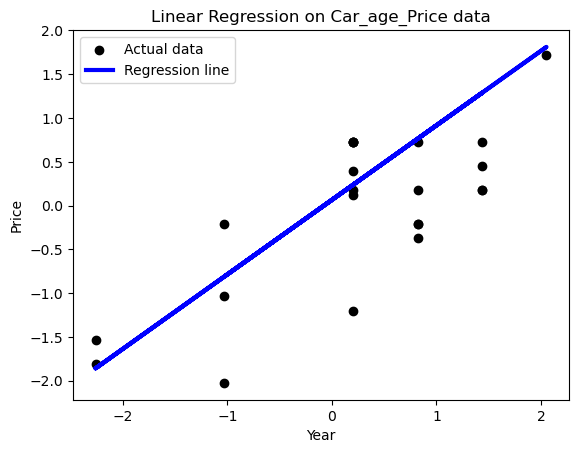

In [33]:
plt.scatter(X_test,y_test,color='black',label='Actual data')
plt.plot(X_test,lm_pred,color='blue',linewidth=3,label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression on Car_age_Price data')
plt.legend()
plt.show()

#### Building the Lasso Regression model

In [34]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.1)

#fit the model
lasso = model2.fit(X_train,y_train)

#prediction
lasso_pred = lasso.predict(X_test)

#### Plotting the linear relationship between Year and Price

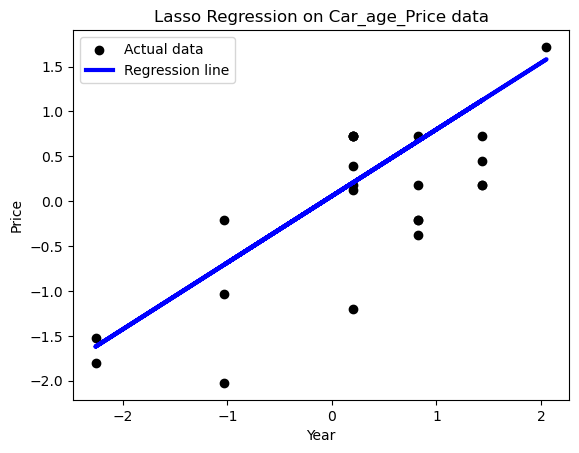

In [37]:
plt.scatter(X_test,y_test,color='black',label='Actual data')
plt.plot(X_test,lasso_pred,color='blue',linewidth=3,label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression on Car_age_Price data')
plt.legend()
plt.show()

#### Model Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error,accuracy_score

lm_err = mean_absolute_error(y_test,lm_pred)
print('MAE by Linear Model :',lm_err)

lasso_err = mean_absolute_error(y_test,lasso_pred)
print('MAE by Lasso Model :',lasso_err)

MAE by Linear Model : 0.5895295935049284
MAE by Lasso Model : 0.5499834870250148


In [39]:
lm_accuracy = lm.score(X_test,y_test)
print('Accuracy of Linear Model :',lm_accuracy)

lasso_accuracy = lasso.score(X_test,y_test)
print('Accuracy of Lasso Model :',lasso_accuracy)

Accuracy of Linear Model : 0.3675931342589792
Accuracy of Lasso Model : 0.448900780639208


#### Conclusion :

When compared to the Linear Regression Model the Lasso Regression Model has a better performance.